In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_df = pd.read_csv('../data/house_data.csv')
data_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
house_df = data_df[['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']]
house_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement
0,221900.0,3,1.00,1180,5650,1180,0
1,538000.0,3,2.25,2570,7242,2170,400
2,180000.0,2,1.00,770,10000,770,0
3,604000.0,4,3.00,1960,5000,1050,910
4,510000.0,3,2.00,1680,8080,1680,0


In [8]:
FEAT_COLS = house_df.columns.tolist()[1:]
FEAT_COLS

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement']

- LinearRegression()

```python
Attributes
----------
coef_ : array, shape (n_features, ) or (n_targets, n_features)
    Estimated coefficients for the linear regression problem.
    If multiple targets are passed during the fit (y 2D), this
    is a 2D array of shape (n_targets, n_features), while if only
    one target is passed, this is a 1D array of length n_features.

intercept_ : array
    Independent term in the linear model.
```

**note1**

- 散点图 和 直线图的 x 是一样的，都是数据集的某一特征的值
- 散点图的 y 为房价， 直线图的 y 为预测值，通过coef和intercept来描述
- 由于单特征进行预测，结果一定不如6维特征一起预测的效果好
- 只有单维特征和预测值组成的二维平面才可以可视化，特征值散点图和拟合曲线直线图

**note2**

- 线性回归对于二分类效果比较好
- 线性回归对于特征维度较少的数据集表现一般
- 线性回归对于环形包围嵌套的数据无法区分，需要非线性回归

bedrooms  -> r2 =  0.09258779614933556


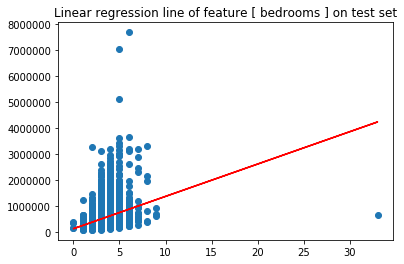

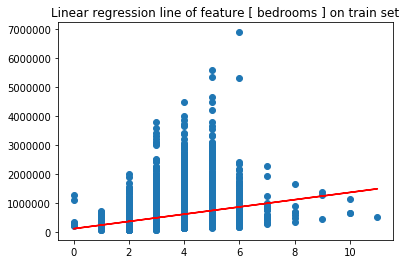

y = [124851.99256747]x + 120297.53766456776
-=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=-

bathrooms  -> r2 =  0.27043501608845366


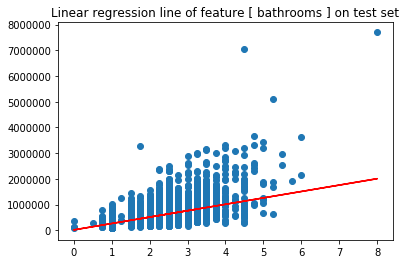

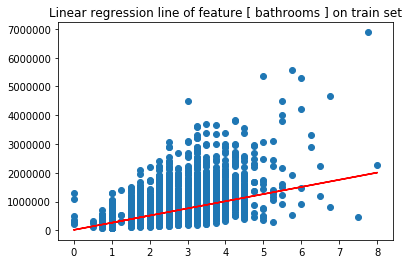

y = [249093.73809333]x + 14079.859509591479
-=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=-

sqft_living  -> r2 =  0.4961737855768537


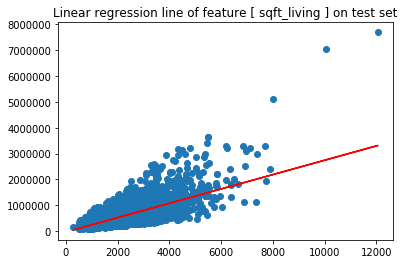

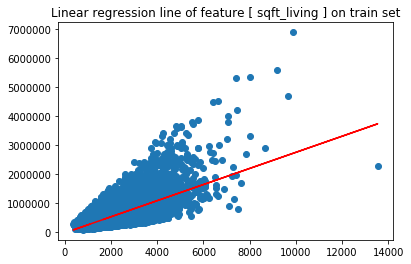

y = [277.9545517]x + -38089.200402716175
-=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=-

sqft_lot  -> r2 =  0.006598795645454514


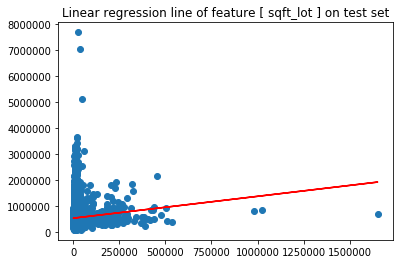

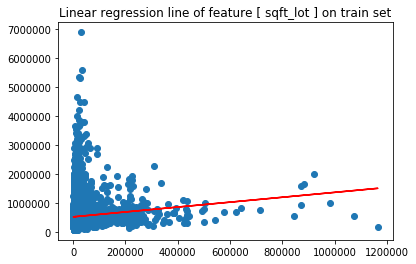

y = [0.84305752]x + 528076.7687315342
-=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=-

sqft_above  -> r2 =  0.35340999022703234


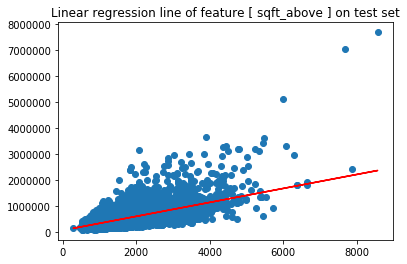

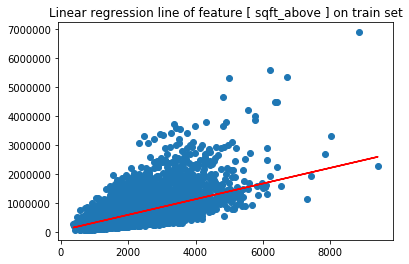

y = [269.32824655]x + 59323.818121225166
-=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=-

sqft_basement  -> r2 =  0.11806711865379738


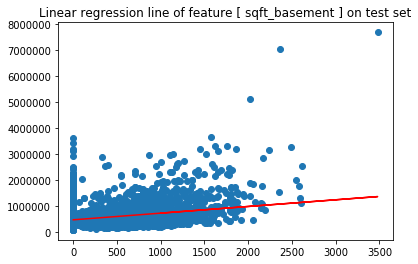

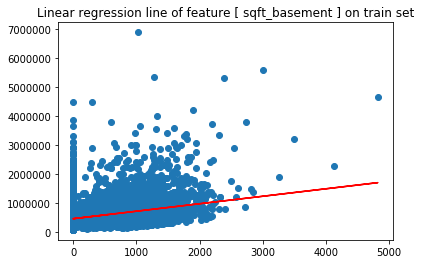

y = [257.32604623]x + 464890.95713180635
-=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=--=*=-



In [30]:
def plot_on_test(feat, coef, intercept, X_test, y_test):
    plt.scatter(X_test, y_test)
    plt.plot(X_test, coef*X_test+intercept, c='r')
    plt.title('Linear regression line of feature [ {} ] on test set'.format(feat))
    plt.show()
    
def plot_on_train(feat, coef, intercept, X_train, y_train):
    plt.scatter(X_train, y_train)
    plt.plot(X_train, coef*X_train+intercept, c='r')
    plt.title('Linear regression line of feature [ {} ] on train set'.format(feat))
    plt.show()  
    
    

for feat in FEAT_COLS:
    X = house_df[feat].values.reshape(-1,1)
    y = house_df['price'].values
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=10)
    lr_model = LinearRegression()
    lr_model.fit(X_train,y_train)
    r2 = lr_model.score(X_test,y_test)
    print(feat, ' -> r2 = ', r2)
    coef = lr_model.coef_
    intercept = lr_model.intercept_
    plot_on_test(feat, coef, intercept, X_test, y_test)
    plot_on_train(feat, coef, intercept, X_train, y_train)
    print('y = {}x + {}'.format(coef, intercept))

    print('-=*=-'*15)
    print()

```python
"""
    任务：房屋价格预测
"""
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

DATA_FILE = './data_ai/house_data.csv'

# 使用的特征列
FEAT_COLS = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']


def plot_fitting_line(linear_reg_model, X, y, feat):
    """
        绘制线型回归线
    """
    w = linear_reg_model.coef_
    b = linear_reg_model.intercept_

    plt.figure()
    # 样本点
    plt.scatter(X, y, alpha=0.5)

    # 直线
    plt.plot(X, w * X + b, c='red')
    plt.title(feat)
    plt.show()


def main():
    """
        主函数
    """
    house_data = pd.read_csv(DATA_FILE, usecols=FEAT_COLS + ['price'])

    for feat in FEAT_COLS:
        X = house_data[feat].values.reshape(-1, 1)
        y = house_data['price'].values

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=10)
        linear_reg_model = LinearRegression()
        linear_reg_model.fit(X_train, y_train)
        r2_score = linear_reg_model.score(X_test, y_test)
        print('特征：{}，R2值：{}'.format(feat, r2_score))

        # 绘制拟合直线
        plot_fitting_line(linear_reg_model, X_test, y_test, feat)


if __name__ == '__main__':
    main()
```